# Классификация грибов на съедобные и несъедобные
Датасет включает описания гипотетических образцов, соответствующих 23 видам грибов из семейства Шампиньоновых. На основании 22 физических характеристик грибы разделяются на два класса: съедобные и несъедобные (определенно ядовитые или неопределенной съедобности и не рекомендуемые к употреблению).
Признаки:
1. форма шляпки (cap-shape): bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. поферхность шляпки (cap-surface): fibrous=f,grooves=g,scaly=y,smooth=s
3. цвет шляпки (cap-color): brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. синяки (bruises): bruises=t,no=f
5. запах (odor): almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. Форма гимениальной пластики/ламелы (gill-attachment): attached=a,descending=d,free=f,notched=n
7. Размещение гимениальной пластики/ламелы (gill-spacing): close=c,crowded=w,distant=d
8. Размер гимениальной пластики/ламелы (gill-size): broad=b,narrow=n
9. Цвет гимениальной пластики/ламелы (gill-color): black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. Форма стебля (stalk-shape): enlarging=e,tapering=t
11. Корень стебля (stalk-root): bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. Поверхность стебля над кольцом (stalk-surface-above-ring): fibrous=f,scaly=y,silky=k,smooth=s
13. Поверхность стебля под кольцом (stalk-surface-below-ring): fibrous=f,scaly=y,silky=k,smooth=s
14. Цвет стебля над кольцом (stalk-color-above-ring): brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. Цвет стебля под кольцом (stalk-color-below-ring): brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. Тип вуали (veil-type): partial=p,universal=u
17. Цвет вуали (veil-color): brown=n,orange=o,white=w,yellow=y
18. Количество колец (ring-number): none=n,one=o,two=t
19. Тип колец (ring-type): cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. Цвет спор (spore-print-color): black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. Тип популяции (population): abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. Среда обитания (habitat): grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

## 1. Чтение данных

In [1]:
from sklearn.datasets import fetch_openml

dataset = fetch_openml('mushroom', as_frame=True, return_X_y=True)
X, Y = dataset[0], dataset[1]
X.head()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name mushroom exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [2]:
X.describe()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,...,s,w,w,p,w,o,p,w,v,d
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Так как тип вуали имеет только одно уникальное значение, можно удалить этот столбец.

In [3]:
X = X.drop(columns=['veil-type'], axis=1)

Пропущенные значения есть только в столбце "корень стебля".

## Визуализация данных по категориальным признакам

Проверим сбалансированность классов.

Text(0.5, 0, 'Классы')

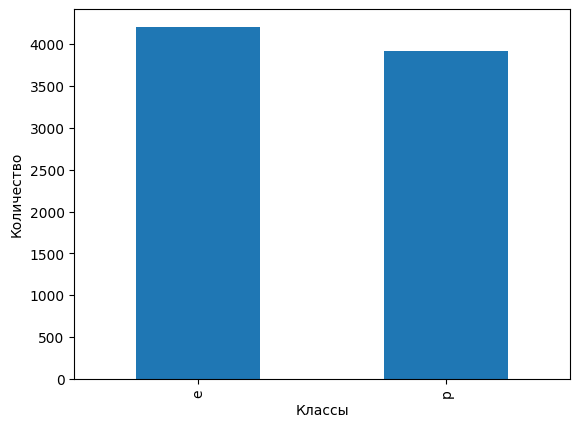

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure()
pd.Series(Y).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Количество")
plt.xlabel("Классы")

Можно сделать вывод о том, что классы сбалансированны.

Построим гистограмму, которая показывает количество съедобных или несъедобных грибов на основании цвета шляпки.

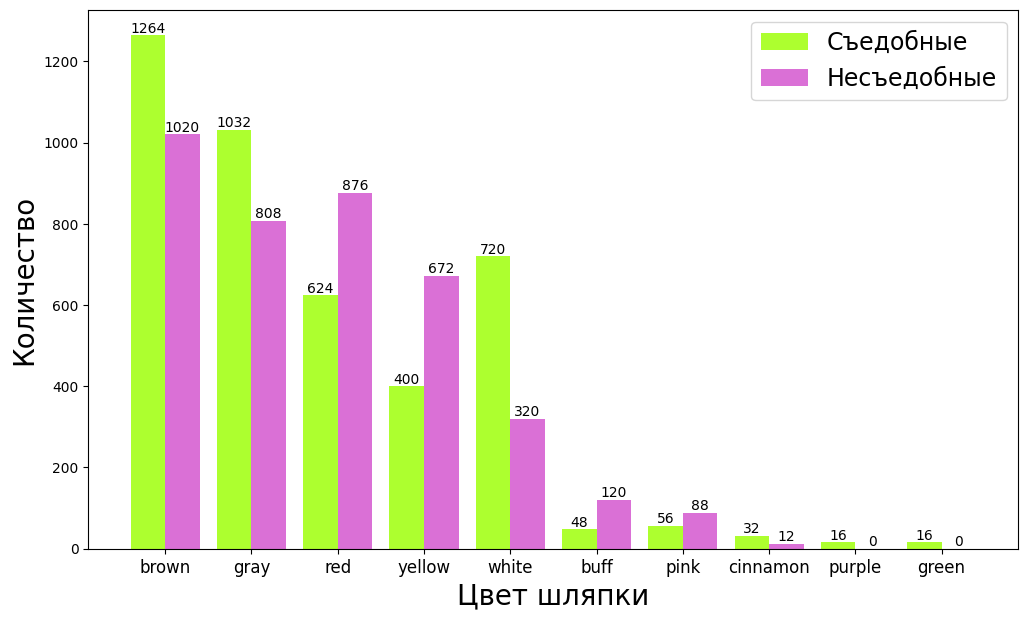

In [5]:
import numpy as np
cap_colors = X['cap-color'].value_counts()
m_height = cap_colors.values.tolist()
cap_colors.axes
cap_color_labels = cap_colors.axes[0].tolist()
ind = np.arange(10)

poisonous_cc = []
edible_cc = []
for capColor in cap_color_labels:
    size = len(X[X['cap-color'] == capColor].index)
    edibles = len(X[(X['cap-color'] == capColor) & (Y == 'e')].index)
    edible_cc.append(edibles)
    poisonous_cc.append(size-edibles)

width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_cc , width, color='#ADFF2F')
poison_bars = ax.bar(ind+width, poisonous_cc , width, color='#DA70D6')

def add_size_to_bar(rects,fontsize=14):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)

ax.set_xlabel("Цвет шляпки",fontsize=20)
ax.set_ylabel('Количество',fontsize=20)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('Съедобные','Несъедобные'),fontsize=17)
add_size_to_bar(edible_bars, 10)
add_size_to_bar(poison_bars, 10)
plt.show()

На основании цвета шляпки тяжело сделать выводы о зависимости параметра и съедобности гриба. Только грибы с фиолетовым или зеленым цветом шляпки являются полностью съедобными.

Построим гистограмму, которая показывает количество съедобных или несъедобных грибов на основании запаха.

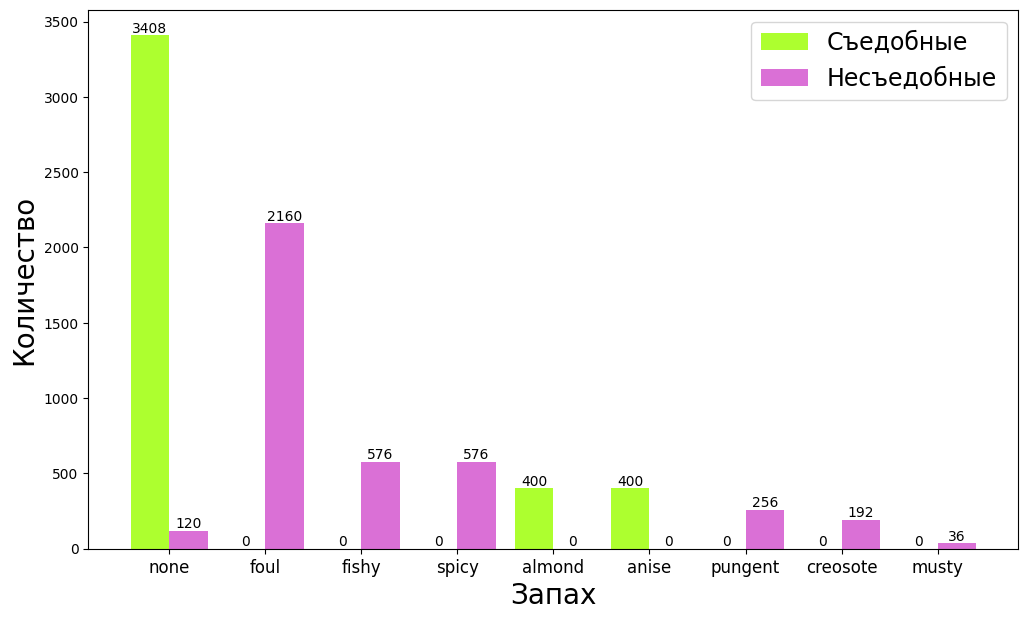

In [6]:
odors = X['odor'].value_counts()
odor_labels = odors.axes[0].tolist()
poisonous_od = []
edible_od = []
for odor in odor_labels:
    size = len(X[X['odor'] == odor].index)
    edibles = len(X[(X['odor'] == odor) & (Y == 'e')].index)
    edible_od.append(edibles)
    poisonous_od.append(size-edibles)

width = 0.40
ind = np.arange(9)
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_od , width, color='#ADFF2F')
poison_bars = ax.bar(ind+width, poisonous_od , width, color='#DA70D6')

ax.set_xlabel("Запах",fontsize=20)
ax.set_ylabel('Количество',fontsize=20)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('Съедобные','Несъедобные'),fontsize=17)
add_size_to_bar(edible_bars, 10)
add_size_to_bar(poison_bars, 10)
plt.show()

Можно заметить, что грибы с ужасным/рыбным/острым/едким/креозотовым/затхлым запахом всегда являются несъедобными, а грибы с миндальным или анисовым запахом всегда съедобные.

## Обработка категориальных признаков
Все признаки являются категориальными, используем LabelEncoder чтобы преобразовать категориальные признаки к количественным. Также LabelEncoder поможет убрать пропущенные значения.


In [7]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
XY_merged = pd.concat([X, Y], axis = 1)
for column in XY_merged.columns:
    XY_merged[column] = labelencoder.fit_transform(XY_merged[column])
X=XY_merged.drop(['class'], axis=1)
Y=XY_merged['class']
X.describe()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


## Визуализация данных по количественным признакам
Построим скрипичный график для получения информации о характере распределения. Можно заметить, что цвет гимениальной пластики/ламелы почти полностью разбивается на две части: большая часть несъедобных лежит ниже 3, а съедобные выше 3.

[Text(0, 0, 'cap-shape'),
 Text(1, 0, 'cap-surface'),
 Text(2, 0, 'cap-color'),
 Text(3, 0, 'bruises%3F'),
 Text(4, 0, 'odor'),
 Text(5, 0, 'gill-attachment'),
 Text(6, 0, 'gill-spacing'),
 Text(7, 0, 'gill-size'),
 Text(8, 0, 'gill-color'),
 Text(9, 0, 'stalk-shape'),
 Text(10, 0, 'stalk-root'),
 Text(11, 0, 'stalk-surface-above-ring'),
 Text(12, 0, 'stalk-surface-below-ring'),
 Text(13, 0, 'stalk-color-above-ring'),
 Text(14, 0, 'stalk-color-below-ring'),
 Text(15, 0, 'veil-color'),
 Text(16, 0, 'ring-number'),
 Text(17, 0, 'ring-type'),
 Text(18, 0, 'spore-print-color'),
 Text(19, 0, 'population'),
 Text(20, 0, 'habitat')]

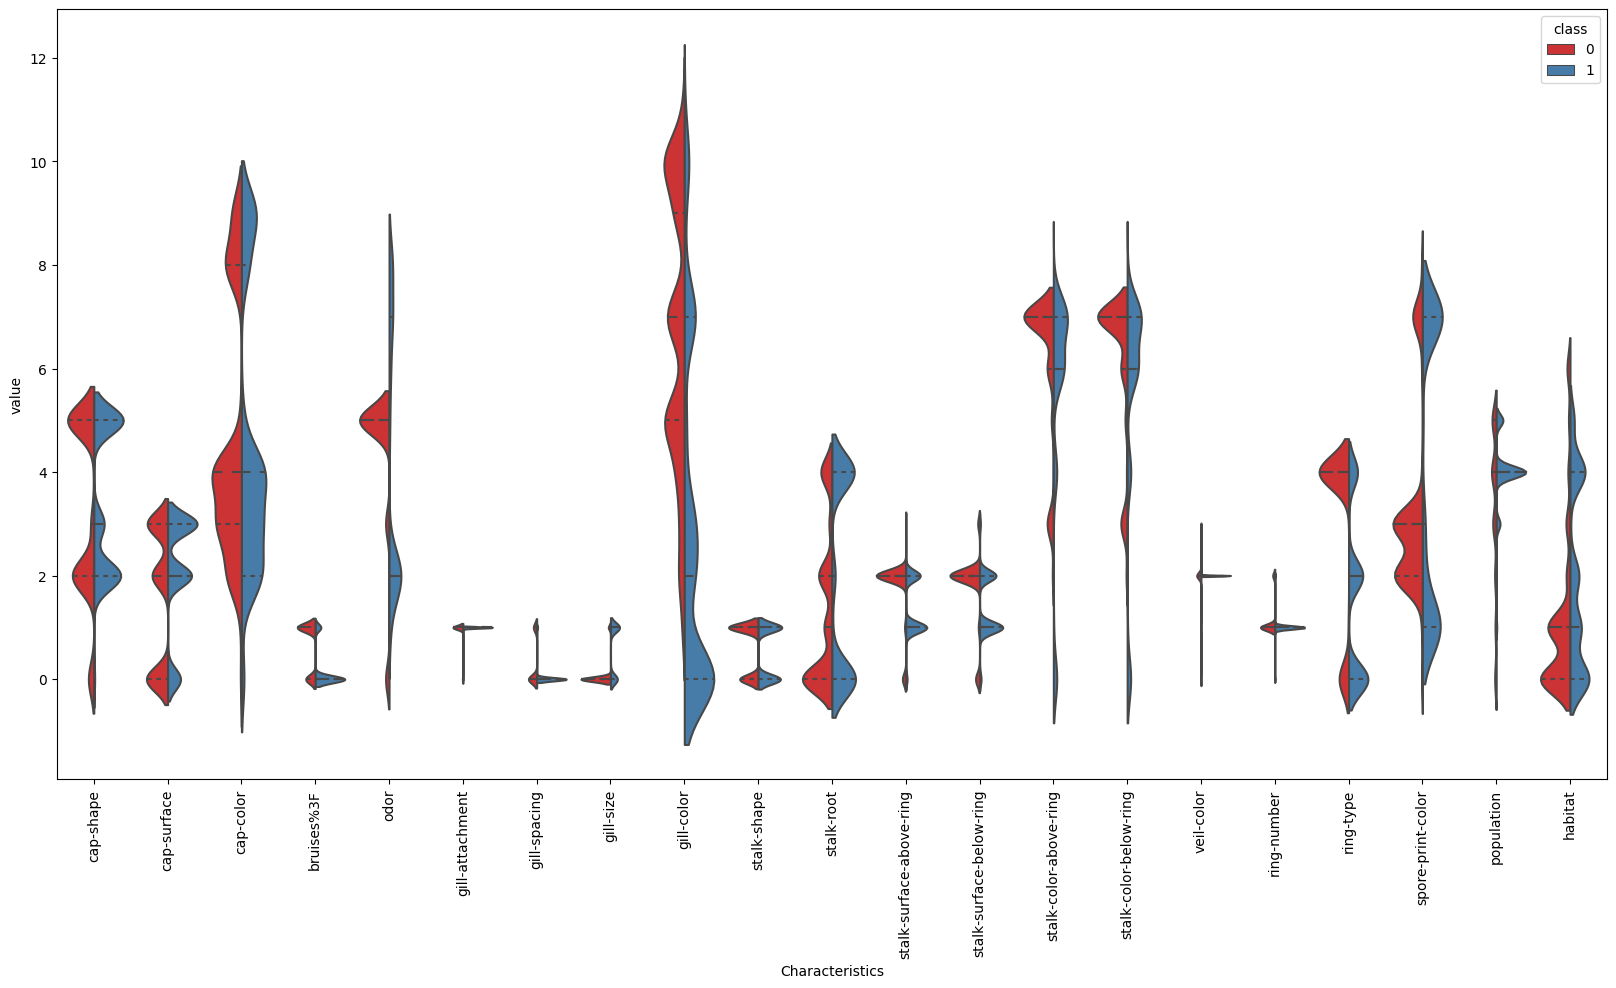

In [8]:
import pandas as pd
import seaborn as sns

XY_melt = pd.melt(XY_merged, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(20,10))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=XY_melt, inner = 'quartile', palette = 'Set1')
p.set_xticklabels(rotation = 90, labels = list(X.columns))

Построим матрицу корреляций между всеми признаками

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0, 0.5, 'cap-shape'),
  Text(0, 1.5, 'cap-surface'),
  Text(0, 2.5, 'cap-color'),
  Text(0, 3.5, 'bruises%3F'),
  Text(0, 4.5, 'odor'),
  Text(0, 5.5, 'gill-attachment'),
  Text(0, 6.5, 'gill-spacing'),
  Text(0, 7.5, 'gill-size'),
  Text(0, 8.5, 'gill-color'),
  Text(0, 9.5, 'stalk-shape'),
  Text(0, 10.5, 'stalk-root'),
  Text(0, 11.5, 'stalk-surface-above-ring'),
  Text(0, 12.5, 'stalk-surface-below-ring'),
  Text(0, 13.5, 'stalk-color-above-ring'),
  Text(0, 14.5, 'stalk-color-below-ring'),
  Text(0, 15.5, 'veil-color'),
  Text(0, 16.5, 'ring-number'),
  Text(0, 17.5, 'ring-type'),
  Text(0, 18.5, 'spore-print-color'),
  Text(0, 19.5, 'population'),
  Text(0, 20.5, 'habitat'),
  Text(0, 21.5, 'class')])

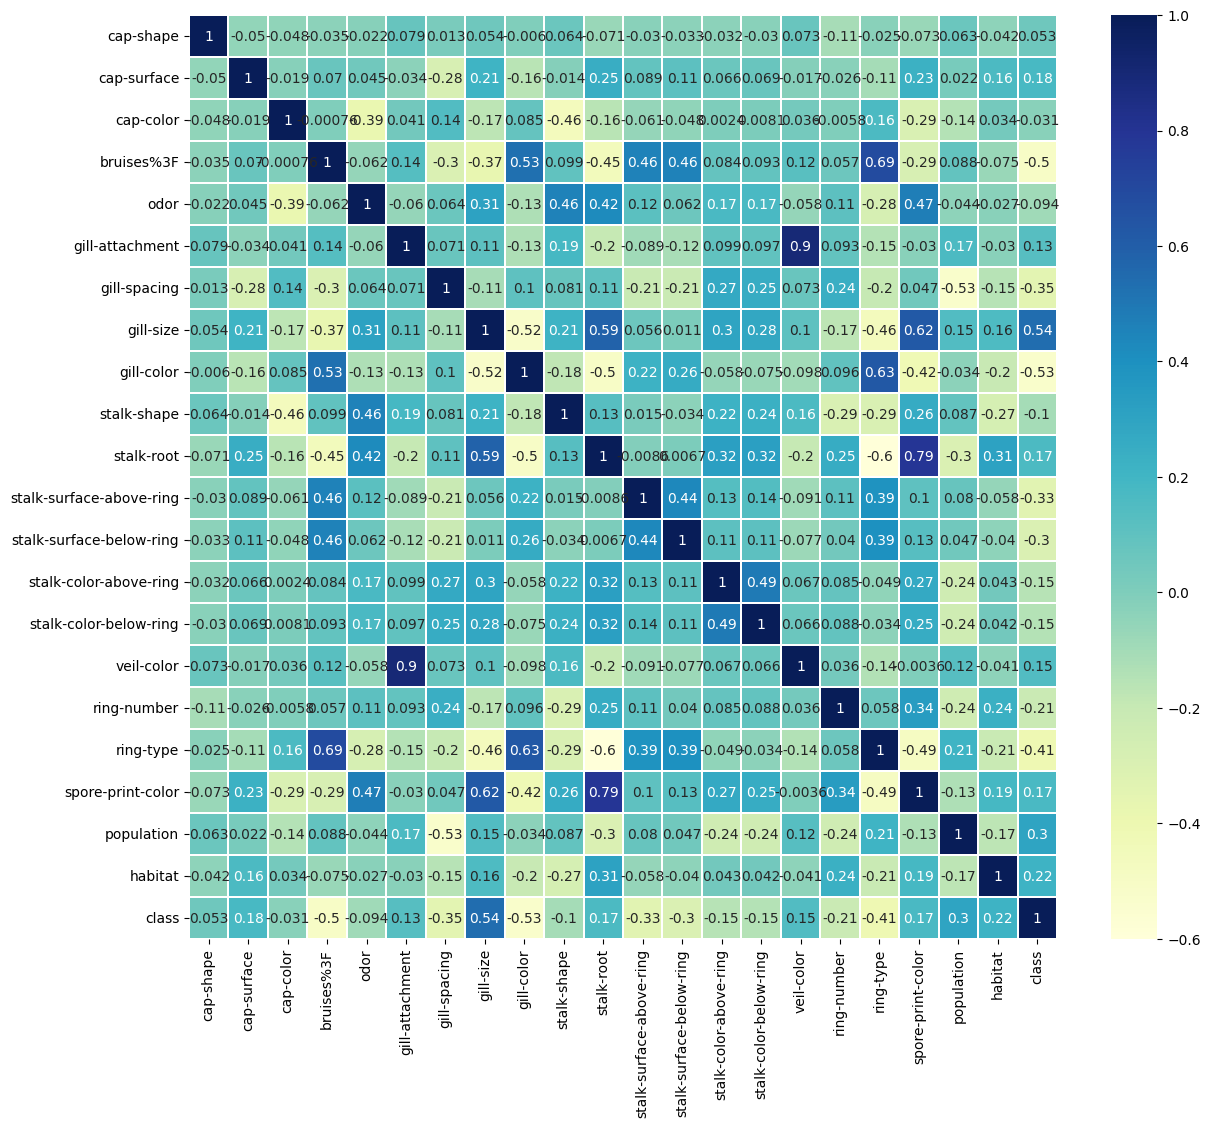

In [9]:
plt.figure(figsize=(14,12))
sns.heatmap(XY_merged.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)

Наибольшая корреляция наблюдается между форма гимениальной пластики/ламелы и цветом вуали, а также цветом спор и корнем стебля.

## Нормализация
Проводить нормализацию нет необходимости, потому что все признаки являются категориальными.

## Разбиение на обучающую и тестовую выборки
Для тестовой выборки использую 20% от всего датасета


In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=42,test_size = 0.2)

## Классификатор ближайших соседей

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn_1k = KNeighborsClassifier(n_neighbors=1)
knn_3k = KNeighborsClassifier(n_neighbors=3)
knn_5k = KNeighborsClassifier(n_neighbors=5)
knn_10k = KNeighborsClassifier(n_neighbors=10)
knn_50k = KNeighborsClassifier(n_neighbors=50)
knn_100k = KNeighborsClassifier(n_neighbors=100)

knn_1k.fit(x_train, y_train)
knn_3k.fit(x_train, y_train)
knn_5k.fit(x_train, y_train)
knn_10k.fit(x_train, y_train)
knn_50k.fit(x_train, y_train)
knn_100k.fit(x_train, y_train)

knn_1k_train_accuracy = round(knn_1k.score(x_train, y_train)*100, 4)
knn_1k_test_accuracy = round(knn_1k.score(x_test, y_test)*100, 4)

knn_3k_train_accuracy = round(knn_3k.score(x_train, y_train)*100, 4)
knn_3k_test_accuracy = round(knn_3k.score(x_test, y_test)*100, 4)

knn_5k_train_accuracy = round(knn_5k.score(x_train, y_train)*100, 4)
knn_5k_test_accuracy = round(knn_5k.score(x_test, y_test)*100, 4)

knn_10k_train_accuracy = round(knn_10k.score(x_train, y_train)*100, 4)
knn_10k_test_accuracy = round(knn_10k.score(x_test, y_test)*100, 4)

knn_50k_train_accuracy = round(knn_10k.score(x_train, y_train)*100, 4)
knn_50k_test_accuracy = round(knn_10k.score(x_test, y_test)*100, 4)

knn_100k_train_accuracy = round(knn_100k.score(x_train, y_train)*100, 4)
knn_100k_test_accuracy = round(knn_100k.score(x_test, y_test)*100, 4)

print(f"Knn n_neighbors = 1 Train Accuracy = {knn_1k_train_accuracy} Test Accuracy = {knn_1k_test_accuracy}")
print(f"Knn n_neighbors = 3 Train Accuracy = {knn_3k_train_accuracy} Test Accuracy = {knn_3k_test_accuracy}")
print(f"Knn n_neighbors = 5 Train Accuracy = {knn_5k_train_accuracy} Test Accuracy = {knn_5k_test_accuracy}")
print(f"Knn n_neighbors = 10 Train Accuracy = {knn_10k_train_accuracy} Test Accuracy = {knn_10k_test_accuracy}")
print(f"Knn n_neighbors = 50 Train Accuracy = {knn_50k_train_accuracy} Test Accuracy = {knn_50k_test_accuracy}")
print(f"Knn n_neighbors = 100 Train Accuracy = {knn_100k_train_accuracy} Test Accuracy = {knn_100k_test_accuracy}")

Knn n_neighbors = 1 Train Accuracy = 100.0 Test Accuracy = 99.9385
Knn n_neighbors = 3 Train Accuracy = 100.0 Test Accuracy = 99.8154
Knn n_neighbors = 5 Train Accuracy = 99.9846 Test Accuracy = 99.6308
Knn n_neighbors = 10 Train Accuracy = 99.8307 Test Accuracy = 99.6308
Knn n_neighbors = 50 Train Accuracy = 99.8307 Test Accuracy = 99.6308
Knn n_neighbors = 100 Train Accuracy = 95.784 Test Accuracy = 95.0769


При n_neighbors = 1, на тестовой выборке получается наименьшая ошибка, почти все классы предсказаны верно. При увеличении n_neighbors ошибка растет, а если брать n_neighbors >= 5, то уже появляются ошибки в тестовой выборке

Посчитаем ошибку на тестовой и обучающей выборках:

In [12]:
from sklearn.metrics import accuracy_score

y_train_pred_1k = knn_1k.predict(x_train)
y_test_pred_1k = knn_1k.predict(x_test)
y_train_pred_3k = knn_3k.predict(x_train)
y_test_pred_3k = knn_3k.predict(x_test)
y_train_pred_5k = knn_5k.predict(x_train)
y_test_pred_5k = knn_5k.predict(x_test)
y_train_pred_10k = knn_10k.predict(x_train)
y_test_pred_10k = knn_10k.predict(x_test)
y_train_pred_50k = knn_50k.predict(x_train)
y_test_pred_50k = knn_50k.predict(x_test)
y_train_pred_100k = knn_100k.predict(x_train)
y_test_pred_100k = knn_100k.predict(x_test)

train_error_1k = 1 - accuracy_score(y_train, y_train_pred_1k)
test_error_1k = 1 - accuracy_score(y_test, y_test_pred_1k)
train_error_3k = 1 - accuracy_score(y_train, y_train_pred_3k)
test_error_3k = 1 - accuracy_score(y_test, y_test_pred_3k)
train_error_5k = 1 - accuracy_score(y_train, y_train_pred_5k)
test_error_5k = 1 - accuracy_score(y_test, y_test_pred_5k)
train_error_10k = 1 - accuracy_score(y_train, y_train_pred_10k)
test_error_10k = 1 - accuracy_score(y_test, y_test_pred_10k)
train_error_50k = 1 - accuracy_score(y_train, y_train_pred_50k)
test_error_50k = 1 - accuracy_score(y_test, y_test_pred_50k)
train_error_100k = 1 - accuracy_score(y_train, y_train_pred_100k)
test_error_100k = 1 - accuracy_score(y_test, y_test_pred_100k)

print(f"Knn n_neighbors = 1 Train error - {train_error_1k} Test error - {test_error_1k}")
print(f"Knn n_neighbors = 3 Train error - {train_error_5k} Test error - {test_error_5k}")
print(f"Knn n_neighbors = 5 Train error - {train_error_5k} Test error - {test_error_5k}")
print(f"Knn n_neighbors = 10 Train error - {train_error_10k} Test error - {test_error_10k}")
print(f"Knn n_neighbors = 50 Train error - {train_error_50k} Test error - {test_error_50k}")
print(f"Knn n_neighbors = 100 Train error - {train_error_100k} Test error - {test_error_100k}")

Knn n_neighbors = 1 Train error - 0.0 Test error - 0.0006153846153845732
Knn n_neighbors = 3 Train error - 0.00015386982612708433 Test error - 0.0036923076923076614
Knn n_neighbors = 5 Train error - 0.00015386982612708433 Test error - 0.0036923076923076614
Knn n_neighbors = 10 Train error - 0.0016925680873980387 Test error - 0.0036923076923076614
Knn n_neighbors = 50 Train error - 0.021234036005539303 Test error - 0.02892307692307694
Knn n_neighbors = 100 Train error - 0.04216033235882444 Test error - 0.04923076923076919


## Классификация методом опорных векторов

In [13]:
from sklearn.svm import SVC

svm_linear = SVC(random_state=42, kernel="linear")
svm_linear.fit(x_train,y_train)
svm_linear_train_accuracy = round(svm_linear.score(x_train, y_train)*100, 4)
svm_linear_test_accuracy = round(svm_linear.score(x_test, y_test)*100, 4)

print(f"SVM Linear kernel Train Accuracy = {svm_linear_train_accuracy} Test Accuracy: {svm_linear_test_accuracy}")

svm_rbf = SVC(random_state=42, kernel="rbf")
svm_rbf.fit(x_train,y_train)
svm_rbf_train_accuracy = round(svm_rbf.score(x_train, y_train)*100, 4)
svm_rbf_test_accuracy = round(svm_rbf.score(x_test, y_test)*100, 4)

print(f"SVM RBF kernel Train Accuracy = {svm_rbf_train_accuracy} Test Accuracy: {svm_rbf_test_accuracy}")

SVM Linear kernel Train Accuracy = 96.1379 Test Accuracy: 95.6308
SVM RBF kernel Train Accuracy = 99.7538 Test Accuracy: 99.8769


При использовании SVM с RBF кернел функцией, точность выше чем у Knn с n_neighbours = 3, но ниже чем у n_neighbours = 1

## Классификация методом случайного леса

In [14]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=42)
clf.fit(x_train,y_train)
clf_train_accuracy = round(clf.score(x_train, y_train)*100, 4)
clf_test_accuracy = round(clf.score(x_test, y_test)*100, 4)

print(f"RF max_deph=2 Accuracy = {svm_linear_train_accuracy} Test Accuracy: {svm_linear_test_accuracy}")

clf = RandomForestClassifier(max_depth=10, random_state=42)
clf.fit(x_train,y_train)
clf_train_accuracy = round(clf.score(x_train, y_train)*100, 4)
clf_test_accuracy = round(clf.score(x_test, y_test)*100, 4)

print(f"RF max_deph=10 Accuracy = {svm_linear_train_accuracy} Test Accuracy: {svm_linear_test_accuracy}")

clf = RandomForestClassifier(random_state=42)
clf.fit(x_train,y_train)
clf_train_accuracy = round(clf.score(x_train, y_train)*100, 4)
clf_test_accuracy = round(clf.score(x_test, y_test)*100, 4)

print(f"RF max_deph=None Accuracy = {svm_linear_train_accuracy} Test Accuracy: {svm_linear_test_accuracy}")

RF max_deph=2 Accuracy = 96.1379 Test Accuracy: 95.6308
RF max_deph=10 Accuracy = 96.1379 Test Accuracy: 95.6308
RF max_deph=None Accuracy = 96.1379 Test Accuracy: 95.6308


При использовании RF, точность ниже чем при использовании других классификаторов

## Логистическая регрессия

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)
print(f"Accuracy of logistic regression classifier on test set: {logreg.score(x_test, y_test)}")
print(f"Accuracy of logistic regression classifier on train set: {logreg.score(x_train, y_train)}")

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy of logistic regression classifier on test set: 0.9544615384615385
Accuracy of logistic regression classifier on train set: 0.9543006616402524
[[819  33]
 [ 41 732]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Обучение классификатора

In [22]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes = (100,100),
                          solver = 'lbfgs',
                          activation = 'logistic',
                          random_state = 42)

In [23]:
%%time
mlp_model.fit(x_train, y_train)

CPU times: user 7.64 s, sys: 7.28 s, total: 14.9 s
Wall time: 7.85 s


MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              random_state=42, solver='lbfgs')

## Проверка качества классификатора

In [24]:
from sklearn.metrics import accuracy_score

y_train_pred = mlp_model.predict(x_train)
y_test_pred = mlp_model.predict(x_test)
print("train accuracy ", accuracy_score(y_train, y_train_pred))
print("test accuracy ", accuracy_score(y_test, y_test_pred))

train accuracy  1.0
test accuracy  0.9993846153846154


## Графики ошибок в зависимости от параметра alpha

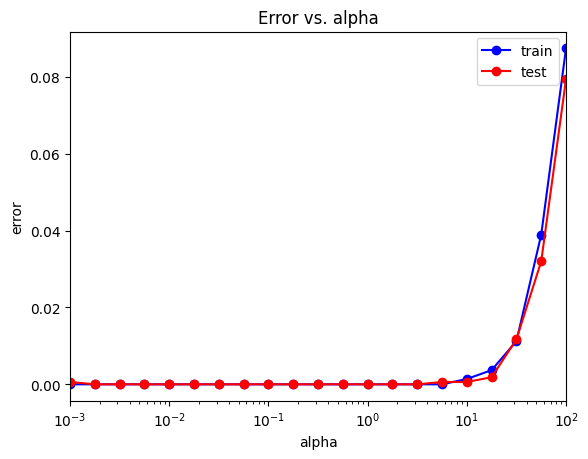

In [25]:
import numpy as np
import matplotlib.pyplot as plt
alpha_arr = np.logspace(-3, 2, 21)

test_err = []
train_err = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,),
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(x_train, y_train)

    y_train_pred = mlp_model.predict(x_train)
    y_test_pred = mlp_model.predict(x_test)

    train_err.append(1 - accuracy_score(y_train, y_train_pred))
    test_err.append(1 - accuracy_score(y_test, y_test_pred))

plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

In [26]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print("Min train error: ", min_train_err, " min test error ", min_test_err)
alpha_opt = alpha_arr[test_err == min_test_err]
print("Optimal alhpa ", alpha_opt)

Min train error:  0.0  min test error  0.0
Optimal alhpa  [1.77827941e-03 3.16227766e-03 5.62341325e-03 1.00000000e-02
 1.77827941e-02 3.16227766e-02 5.62341325e-02 1.00000000e-01
 1.77827941e-01 3.16227766e-01 5.62341325e-01 1.00000000e+00
 1.77827941e+00 3.16227766e+00]


## Графики зависимости ошибки от количества нейронов

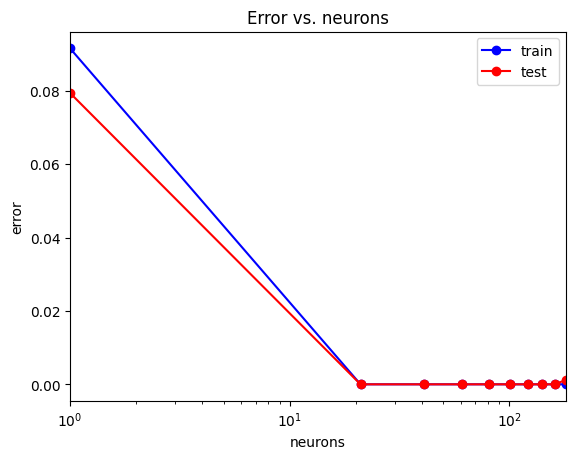

In [27]:
import numpy as np
import matplotlib.pyplot as plt
neurons_count = np.array([x for x in range(1, 200, 20)])

test_err = []
train_err = []

for neurons in neurons_count:
    mlp_model = MLPClassifier(alpha = alpha_opt[0], hidden_layer_sizes = (neurons,),
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(x_train, y_train)

    y_train_pred = mlp_model.predict(x_train)
    y_test_pred = mlp_model.predict(x_test)

    train_err.append(1 - accuracy_score(y_train, y_train_pred))
    test_err.append(1 - accuracy_score(y_test, y_test_pred))

plt.semilogx(neurons_count, train_err, 'b-o', label = 'train')
plt.semilogx(neurons_count, test_err, 'r-o', label = 'test')
plt.xlim([np.min(neurons_count), np.max(neurons_count)])
plt.title('Error vs. neurons')
plt.xlabel('neurons')
plt.ylabel('error')
plt.legend()

In [28]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print("Min train error: ", min_train_err, " min test error ", min_test_err)

neurons_opt = neurons_count[test_err == min_test_err]
print("Optimal neurons ", neurons_opt)

Min train error:  0.0  min test error  0.0
Optimal neurons  [ 21  41  61  81 101 121 141 161]


## Заключение
В результате работы была рассмотрена задача классификации на примере классификации грибов по их физическим свойствам на съедобные и не съедобные. Классы сбалансированны. Все признаки были категориальные, поэтому ,был применен LabelEncoding, который перевёл все признаки в числовые значения. Сильного разброса в значениях не было, поэтому нет необходимости использовать нормализацию. Значительных выбросов в данных не наблюдалось, пропущенные значения обработал LabelEncoding. Некоторые из признаков достаточно сильно коррелируют между собой.

Данные были разделены на тестовую и обучающую выборки и были переданы в модель классификатора ближайших соседей и машины опорных векторов. Получившаяся точность близка к 100%, на обоих классификаторах. Гиперпараметры достаточно сильно влияют на точность, поэтому были подобраны наилучшие параметры, показывающие наибольшую точность тестовой выборки.

Помимо этого, в результате работы была обучена полносвязная нейронная сеть на задаче классификации грибов по их физическим свойствам на съедобные и не съедобные. Данные были разделены на тестовую и обучающую выборки и были подобраны наиболее подходящие гиперпараметры alpha и количество нейронов. Получившаяся точность равна 100% на тренировочной и тестовой выборках. Данная точность достигнута благодаря тому, что грибы почти всегда однозначно можно классифицировать на съедобные и несъедобные только по одному признаку "запах". Необходимо только классифицировать грибы без запаха.